# Data Analysis 

## Santander Bike Data vs Weather Conditions

#### Importing Libraries

In [39]:
# Importing libraries
import os
import warnings
import csv
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # visualing matplotlib
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
## The path where we have datasets
print(os.listdir("./data"))

['background2.jpg', 'Data.csv', 'data_analysis.py', 'data_averages.csv', 'data_av_timesplit.csv', 'formatter.py', 'time_split.py']


#### Loading Data

In [41]:
filename = "data/data_averages.csv"
data = pd.read_csv(filename, index_col=0)

# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(filename, 'r') as csvfile: 
                 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader)
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
        
timestamp = []
av_bike = []
av_temp = []
av_wind = []
norm_av_bike = []
norm_av_temp = []
norm_av_wind = []

for i in rows:
    timestamp.append(i[0])
    av_bike.append(float(i[1]))
    av_temp.append(float(i[2]))
    av_wind.append(float(i[3]))
    norm_av_bike.append(float(i[4]))
    norm_av_temp.append(float(i[5]))
    norm_av_wind.append(float(i[6]))

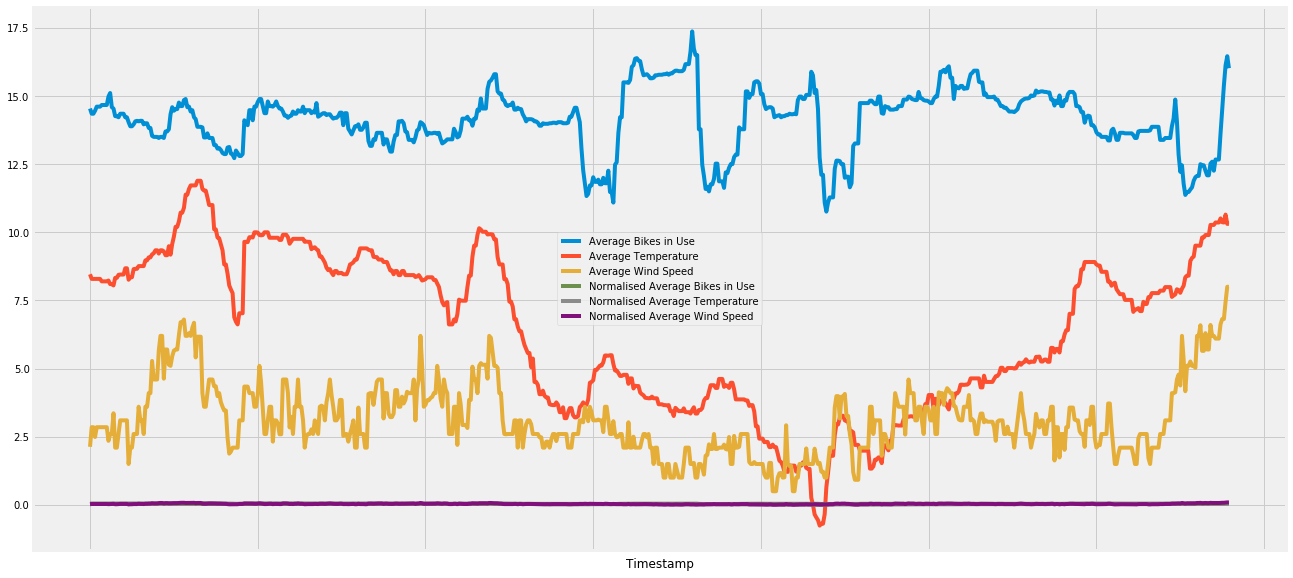

In [43]:
ax = data.plot()
fig = ax.get_figure()
fig.set_size_inches(20, 10)

In [45]:
print(data.corr())
print(data.index)

                                 Average Bikes in Use  Average Temperature  \
Average Bikes in Use                         1.000000            -0.147776   
Average Temperature                         -0.147776             1.000000   
Average Wind Speed                          -0.120108             0.628680   
Normalised Average Bikes in Use              1.000000            -0.147776   
Normalised Average Temperature              -0.147776             1.000000   
Normalised Average Wind Speed               -0.120108             0.628680   

                                 Average Wind Speed  \
Average Bikes in Use                      -0.120108   
Average Temperature                        0.628680   
Average Wind Speed                         1.000000   
Normalised Average Bikes in Use           -0.120108   
Normalised Average Temperature             0.628680   
Normalised Average Wind Speed              1.000000   

                                 Normalised Average Bikes in Use  \

DatetimeIndex(['2018-12-28 17:20:03', '2018-12-28 17:40:04',
               '2018-12-28 18:00:05', '2018-12-28 18:20:03',
               '2018-12-28 18:40:04', '2018-12-28 19:00:05',
               '2018-12-28 19:20:03', '2018-12-28 19:40:04',
               '2018-12-28 20:00:05', '2018-12-28 20:20:04',
               ...
               '2019-01-07 16:00:03', '2019-01-07 16:20:03',
               '2019-01-07 16:40:03', '2019-01-07 17:00:03',
               '2019-01-07 17:20:03', '2019-01-07 17:40:03',
               '2019-01-07 18:00:04', '2019-01-07 18:20:03',
               '2019-01-07 18:40:03', '2019-01-07 19:00:03'],
              dtype='datetime64[ns]', name='Timestamp', length=680, freq=None)


KeyError: "None of [DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 16:00:00',\n               '2019-01-02 08:00:00', '2019-01-03 00:00:00',\n               '2019-01-03 16:00:00', '2019-01-04 08:00:00',\n               '2019-01-05 00:00:00', '2019-01-05 16:00:00',\n               '2019-01-06 08:00:00', '2019-01-07 00:00:00'],\n              dtype='datetime64[ns]', freq=None)] are in the [index]"

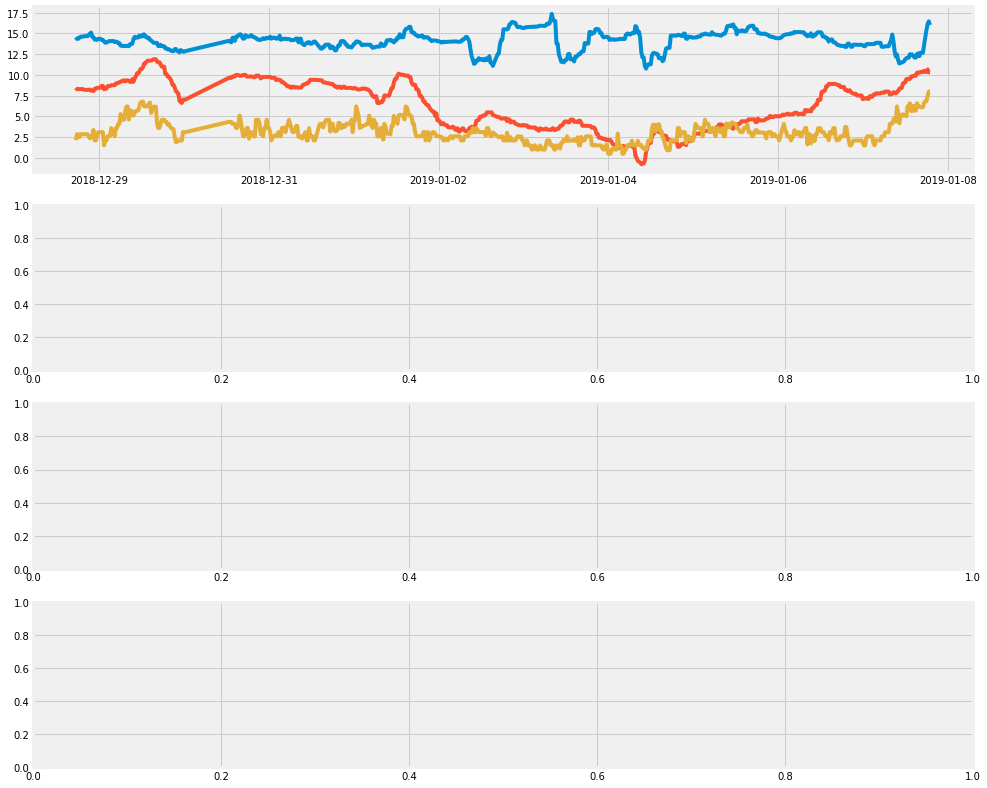

In [66]:
data.index = pd.to_datetime(data.index)
titles = ['Average Bikes in Use', 'Average Temperature', 'Average Wind Speed']

t0 = data.index
print(t0)
# t1 = pd.date_range(start='1/1/2019', end='1/07/2019', periods=10)
t2 = pd.date_range(pd.to_datetime('1/1/2019',dayfirst=True),pd.to_datetime('7/1/2019' ,dayfirst=True),freq='H')
t3 = pd.date_range(pd.to_datetime('4/1/2019',dayfirst=True),pd.to_datetime('5/1/2019',dayfirst=True),freq='H')
t = [t0, t1, t2, t3]

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(15,14))
for i, t in enumerate(t):
    for k in range(len(titles)):
        ax[i].plot(t,data.loc[t,titles[k]])

ax[0].legend(titles, fontsize=16,
              loc='upper left',bbox_to_anchor=(0.02,1.3), ncol=len(titles))
for i in range(len(ax)): ax[i].set_ylabel('Temperature [$^\circ$K]', fontsize=11)
ax[3].set_xlabel('time', fontsize=14);

In [49]:
filename = "data/data_av_timesplit.csv"
data_timesplit = pd.read_csv(filename)

# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(filename, 'r') as csvfile: 
                 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader)
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
        

In [51]:
data_timesplit.corr()

,bike0,temp0,wind0,bike1,temp1,wind1,bike2,temp2,wind2,bike3,...,wind20,bike21,temp21,wind21,bike22,temp22,wind22,bike23,temp23,wind23
bike0,1.000000,-0.310999,-0.329193,-0.166306,-0.505964,-0.182837,0.110404,-0.503532,-0.377260,0.097934,...,-0.384750,0.837684,-0.400702,-0.113593,0.684408,-0.381680,-0.032997,0.693799,-0.334970,-0.050042
temp0,-0.310999,1.000000,0.612844,-0.436386,0.657753,-0.007567,-0.573255,0.746093,0.222693,-0.598646,...,0.648700,-0.575360,0.958435,0.622019,-0.492006,0.871661,0.418948,-0.514479,0.894197,0.696315
wind0,-0.329193,0.612844,1.000000,-0.188382,0.298206,-0.122938,-0.242786,0.395802,0.026448,-0.273814,...,0.624937,-0.531517,0.540867,0.729146,-0.593502,0.504196,0.562068,-0.566164,0.522330,0.623754
bike1,-0.166306,-0.436386,-0.188382,1.000000,-0.333507,-0.123987,0.617944,-0.374937,-0.307847,0.603017,...,-0.223283,0.017429,-0.251877,-0.296302,-0.179382,-0.179024,-0.026843,-0.127388,-0.222038,-0.243234
temp1,-0.505964,0.657753,0.298206,-0.333507,1.000000,0.293148,-0.395328,0.913544,0.407058,-0.398925,...,0.362232,-0.635083,0.590492,0.385283,-0.532978,0.432467,-0.120820,-0.527143,0.440524,0.115390
wind1,-0.182837,-0.007567,-0.122938,-0.123987,0.293148,1.000000,-0.260341,0.208101,0.804311,-0.257577,...,-0.129469,-0.146720,-0.123046,0.115540,0.032669,-0.116169,-0.327710,0.070531,-0.073353,-0.135953
bike2,0.110404,-0.573255,-0.242786,0.617944,-0.395328,-0.260341,1.000000,-0.437923,-0.430613,0.986696,...,-0.375343,0.239989,-0.482251,-0.387172,-0.028760,-0.531100,-0.270425,0.006529,-0.598311,-0.434745
temp2,-0.503532,0.746093,0.395802,-0.374937,0.913544,0.208101,-0.437923,1.000000,0.448863,-0.449915,...,0.521585,-0.634340,0.681073,0.459260,-0.559668,0.581323,0.017757,-0.547445,0.583780,0.241596
wind2,-0.377260,0.222693,0.026448,-0.307847,0.407058,0.804311,-0.430613,0.448863,1.000000,-0.417633,...,0.191592,-0.335573,0.097348,0.274384,-0.143488,0.077840,-0.260176,-0.123347,0.128128,0.033861
bike3,0.097934,-0.598646,-0.273814,0.603017,-0.398925,-0.257577,0.986696,-0.449915,-0.417633,1.000000,...,-0.394668,0.261047,-0.509386,-0.440836,0.005416,-0.555823,-0.309937,0.029782,-0.623234,-0.487400


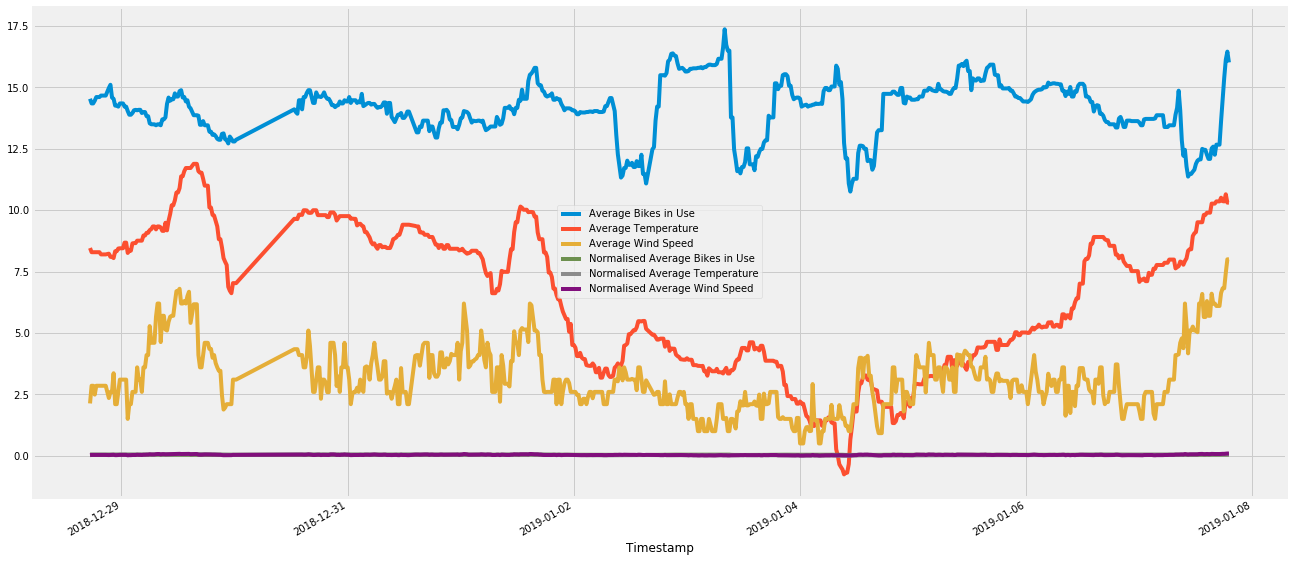

In [52]:
ax = data.plot()
fig = ax.get_figure()
fig.set_size_inches(20, 10)